In [18]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#prepare image for detection by the trained model.
i = 0
activation = ['softmax', 'sigmoid']
actv = activation[i]
label_names = ["Dog", "Cat", "Car", "Unknown"]
# label_names = ["Car", "Unknown"]
def process_image(file_path):
    image_size = 100
    cv_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(cv_image, (image_size, image_size))
    plt.imshow(resized_image, cmap='gray')
    plt.show()
    return resized_image.reshape(-1, image_size, image_size, 1)

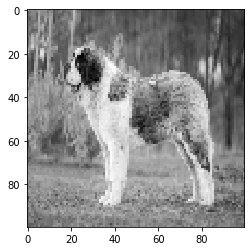

[[0.99721646 0.         0.         0.00278357]]


In [50]:

#load the training model for detection
trained_model = tf.keras.models.load_model('image_classification_CNN_' + actv + '.model')
image_to_predict = './test_images/dog.jpg'
result = trained_model.predict([process_image(image_to_predict)])
print(result)

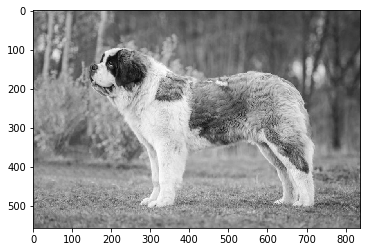

Dog


In [51]:
#display the predicted image
cv_image = cv2.imread(image_to_predict ,cv2.IMREAD_GRAYSCALE)
plt.imshow(cv_image, cmap='gray')
plt.show()

# Print the prediction
print(label_names[np.argmax(result)])